Kimberly Adams <br>
DSC 520
September 2022


# Chapter 1

Download data files from github

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

# Download functions
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

# Download data
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

### Excercise 1-1 

Import data from file into data frame

In [31]:
import nsfg
preg = nsfg.ReadFemPreg()

# Return alphabetically sorted list of all column names
# sorted(preg)

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](https://ftp.cdc.gov/pub/health_Statistics/NCHs/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [3]:
birthord = preg.birthord
preg.birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

*The table I got has the same values as the codebook with the exception that my table does not include the "INAPPLICABLE" category as seen in the codebook which has a value of 4445.*

<div>
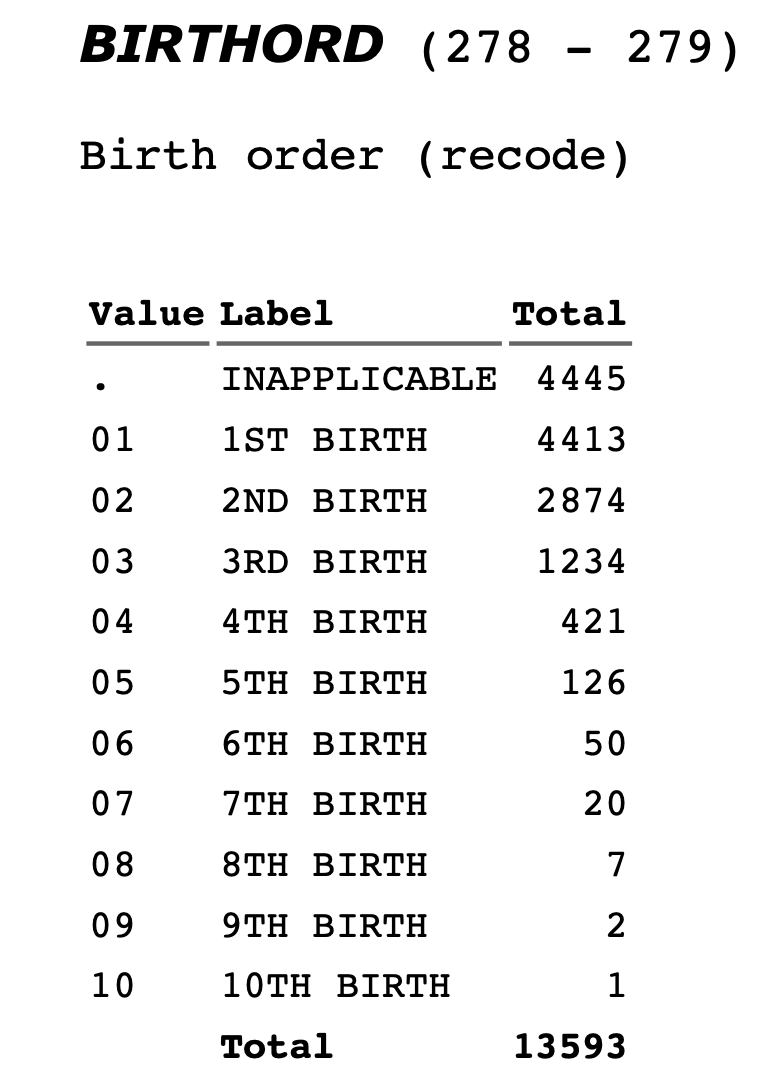
</div>

*We can count the number of non-answers which gives us the value of "INAPPLICABLE" that was in the codebook.*

In [4]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](https://ftp.cdc.gov/pub/health_Statistics/NCHs/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [5]:
prglngth = preg.prglngth
preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

*Since the table in the codebook has the values summarized into 3 categories, I'll go ahead and calculate those:*

In [6]:
x = sum(prglngth <=13)
y = sum((prglngth >=14) & (prglngth <=26))
z = sum(prglngth >=27)
print("0-13 Weeks or Less ", x)
print("14-26 Weeks        ", y)
print("27 Weeks or longer ", z)

0-13 Weeks or Less  3522
14-26 Weeks         793
27 Weeks or longer  9278


*The values I got are the same values summarized in the codebook:*

<div>
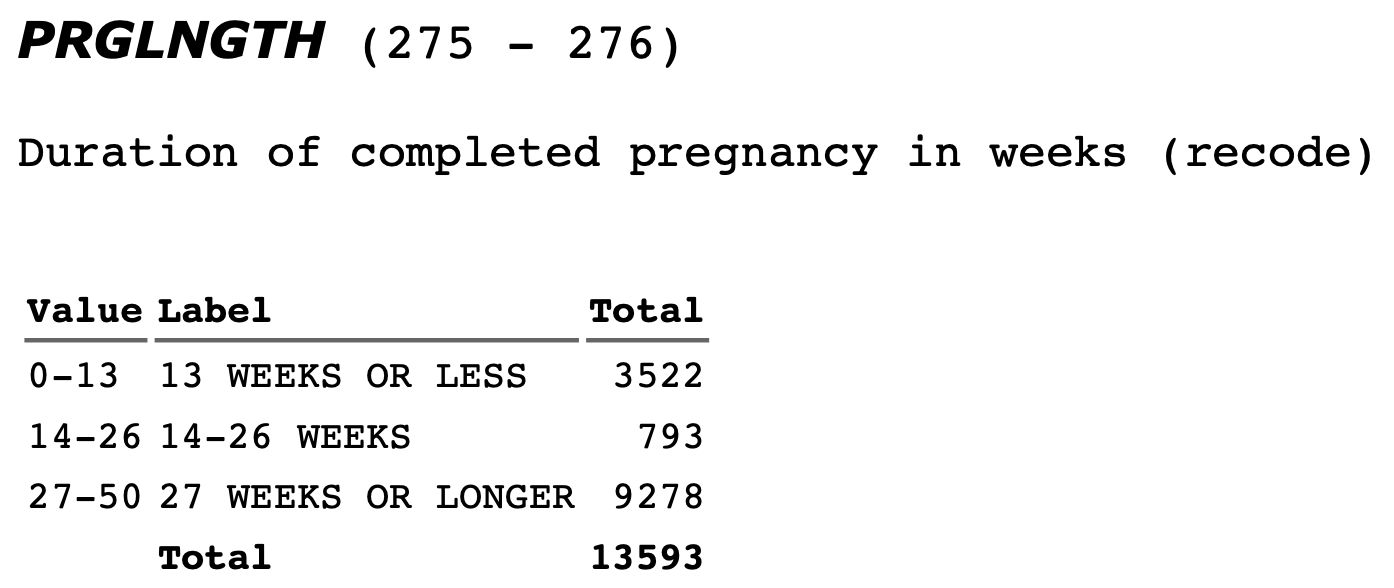
</div>

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.

In [7]:
preg["totalwgt_kg"]= preg["totalwgt_lb"] / 2.2
print(preg[['totalwgt_lb','totalwgt_kg']])

       totalwgt_lb  totalwgt_kg
0           8.8125     4.005682
1           7.8750     3.579545
2           9.1250     4.147727
3           7.0000     3.181818
4           6.1875     2.812500
...            ...          ...
13588       6.1875     2.812500
13589          NaN          NaN
13590          NaN          NaN
13591       7.5000     3.409091
13592       7.5000     3.409091

[13593 rows x 2 columns]


Calculate mean weight in kg:

In [8]:
preg.totalwgt_kg.mean()

3.302558389828807

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [9]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [10]:
resp = nsfg.ReadFemResp()
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  

In [11]:
age_r = resp.age_r
resp.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

How old are the youngest and oldest respondents?

In [12]:
# Find the min and max values for the age_r column
youngest = min(age_r)
oldest = max(age_r)
print("Youngest = ", youngest, ", Oldest = ", oldest)

Youngest =  15 , Oldest =  44


How old is the respondent with `caseid` 1?

In [13]:
# Search for caseid 1 and return value of age_r column for that row
resp[resp.caseid == 1].age_r

1069    44
Name: age_r, dtype: int64

*The respondant with caseid 1 is 44 years old.*

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [14]:
# Search for caseid 2298 in the pregnancy data table and return values of prglngth for records with that caseid
preg[preg.caseid == 2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

*The mother with caseid 2298 has given birth 4 times with her pregancies lasting 40, 36, 30, and 40 weeks.*

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [15]:
# Search for caseid 5012 in the pregnancy data table and return value of birthwgt_lb for records with that caseid
preg[preg.caseid == 5012].birthwgt_lb

5515    6.0
Name: birthwgt_lb, dtype: float64

*In this case the mother has only had one birth recorded with the baby weighing 6.0lbs. We can doulbe check that this is her first child:*

In [16]:
# Double checking that this is her first child
preg[preg.caseid == 5012].birthord

5515    1.0
Name: birthord, dtype: float64

*The row numbers (5515) both match and the birthord value is 1.0 indicating this is indeed her first child.*

### Excercise 1-2

The variable `pregnum` is a recode that indicates how many times each respondent has been pregnant. Print the value counts for this variable. 

In [17]:
pregnum = resp.pregnum
resp.pregnum.value_counts().sort_index()

0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: pregnum, dtype: int64

Compare them to the published results in the NSFG codebook. 

<div>
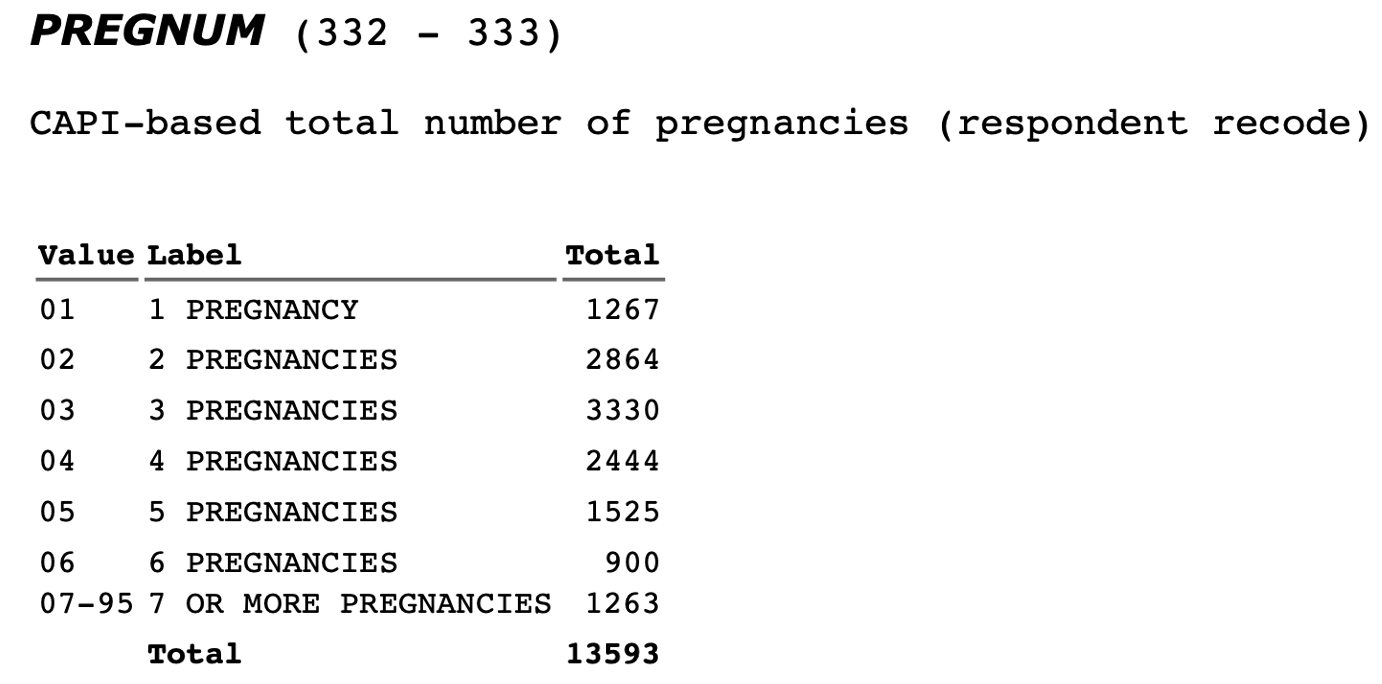
</div>



In [18]:
sum(pregnum >=7)

158

In [19]:
preg.pregnum.value_counts().sort_index()

1     1267
2     2864
3     3330
4     2444
5     1525
6      900
7      560
8      320
9      189
10      90
11      33
12      24
14      28
19      19
Name: pregnum, dtype: int64

*My numbers do NOT match the published codebook when I run the code on the respondent data frame, but do match when run on the pregnancy data frame.  It looks like the values I am getting from the pregnancy data are equal to the number of births multiplied by the frequency counts given by the respondent data frame.*

*It makes sense to me that the respondent numbers would be more accurate (if each respondent is only listed once) since each mother would have a single value for how many pregnancies they had.  Whereas it seems like the pregnancy dataset lists the total number of pregnancies each woman had for each record of a single pregnancy, thus artificially inflating the total numbers.*


*Side note: Good lord some mothers have had 19 pregnancies!*

Cross-validate the respondent and pregnancy files by comparing `pregnum` for each respondent with the number of records in the pregnancy file.

In [20]:
sum(pregnum)

13593

In [21]:
def Validatation(resp):
    # Map pregnancy data frame by caseid
    preg_map = nsfg.MakePregMap(preg)
    
    # Look up each caseid in the respondent data frame and check pregnum
    for index, pregnum in resp.pregnum.items():
        caseid = resp.caseid[index]
        indices = preg_map[caseid]

        # See if the pregnum in the respondent data frame is equal to the number of records in the prenancy data frame
        if len(indices) != pregnum:
            print(caseid, len(indices), pregnum)
            return False

    return True

Validatation(resp)

True

*The validation shows that the `pregnum` number in the respondent data frame is equal to the number of pregnancy records for each caseid within the prenancy dataframe.*

# Chapter 2

In [22]:
import numpy as np
import thinkstats2
import thinkplot

### Excercise 2-1

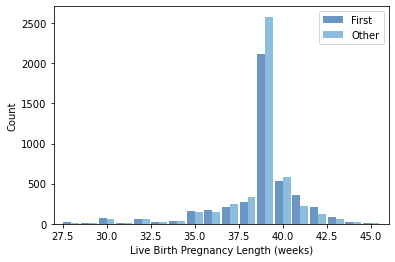

In [23]:
# Select only pregnancies ending with a live birth
live = preg[preg.outcome ==1]

# Separate out first child pregnancies
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

# Plot histograms of each type of pregnancy
first_hist = thinkstats2.Hist(firsts.prglngth, label='First')
other_hist = thinkstats2.Hist(others.prglngth, label='Other')

# Put histogram columns side-by-side and limit x-axis to x is between 27 and 46 weeks
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='Live Birth Pregnancy Length (weeks)', ylabel='Count', xlim=[27, 46])

Summary statistics:

In [24]:
mean = live.prglngth.mean()
print("Overall Mean     ", mean)

var = live.prglngth.var()
print("Overall Variance ", var)

std = live.prglngth.std()
print("Overall SD       ", std)

Overall Mean      38.56055968517709
Overall Variance  7.302662067826851
Overall SD        2.702343810070593


In [25]:
print("First Birth Mean ", firsts.prglngth.mean())
print("Other Birth Mean ", others.prglngth.mean())
difference = firsts.prglngth.mean() - others.prglngth.mean()
DiffDays = difference * 7
print("Difference (F-O) ", difference, "=", DiffDays, "days")

First Birth Mean  38.60095173351461
Other Birth Mean  38.52291446673706
Difference (F-O)  0.07803726677754952 = 0.5462608674428466 days


This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [26]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [27]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

Which summary statistics would you use if you wanted to get a story on the evening news? Which ones would you use if you wanted to reassure an anxious patient? 

*For the general public, the mean (or average) is probably the most recognizable out of all the summary statistics we use.  People more naturally understand it and use it more often in their everyday lives.  They also understand that there is a natural variation in populations and that there is no exact "correct" value for everyone. Also putting things into perspective (such as hours out of a months long pregnancy can certainly help show how small any differences are.*

Finally, imagine that you are Cecil Adams, author of The Straight Dope, and your job is to answer the question, “Do first babies arrive late?” Write a paragraph that uses the results in this chapter to answer the question clearly, precisely, and honestly.

*On average, the birth of a first child occurs roughly half a day (about 13 hours) later than subsequent births on average.  However, it should be noted that there is a lot of natural variation in the length of pregnancies (2.7 weeks) reguardless of what child it is for the mother. Also, when you consider the full length of a pregnancy, 13 hours is very insignificant.  As seen in the graph of pregnancy lengths, there is no distinctive difference between first births and other births so expecting parents should not worry about timing differences and just enjoy the experience - however long it lasts.*

### Excercise 2-4.  
Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

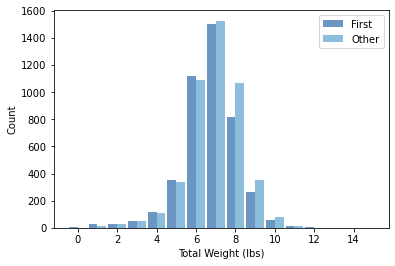

In [38]:
# Select only pregnancies ending with a live birth
live = preg[preg.outcome ==1]

# Separate out first child pregnancies
firsts = np.floor(live[live.birthord == 1])
others = np.floor(live[live.birthord != 1])

# Plot histograms of each type of pregnancy
firstwgt_hist = thinkstats2.Hist(firsts.totalwgt_lb, label='First')
otherwgt_hist = thinkstats2.Hist(others.totalwgt_lb, label='Other')

# Put histogram columns side-by-side and limit x-axis to x is between 27 and 46 weeks
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(firstwgt_hist, align='right', width=width)
thinkplot.Hist(otherwgt_hist, align='left', width=width)
thinkplot.Config(xlabel='Total Weight (lbs)', ylabel='Count')

Summary statistics:

In [28]:
meanwgt = live.totalwgt_lb.mean()
print("Overall Mean     ", meanwgt)

varwgt = live.totalwgt_lb.var()
print("Overall Variance ", varwgt)

stdwgt = live.totalwgt_lb.std()
print("Overall SD       ", stdwgt# Select only pregnancies ending with a live birth
live = preg[preg.outcome ==1]

# Separate out first child pregnancies
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

# Plot histograms of each type of pregnancy
first_hist = thinkstats2.Hist(firsts.prglngth, label='First')
other_hist = thinkstats2.Hist(others.prglngth, label='Other')

# Put histogram columns side-by-side and limit x-axis to x is between 27 and 46 weeks
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='Live Birth Pregnancy Length (weeks)', ylabel='Count', xlim=[27, 46])

Summary statistics:)

Overall Mean      7.265628457623368
Overall Variance  1.9832904288326532
Overall SD        1.4082934455690168


In [29]:
print("First Birth Mean ", firsts.totalwgt_lb.mean())
print("Other Birth Mean ", others.totalwgt_lb.mean())
difference = firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean()
print("Difference (F-O) ", difference, "lbs")

First Birth Mean  7.201094430437772
Other Birth Mean  7.325855614973262
Difference (F-O)  -0.12476118453549034 lbs


Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [30]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

*Based on the data in the sample, first-born children are on average 0.12 lbs lighter than children born later.  The difference between the groups is overall very small though with a Cohen's d value of -0.09 which is almost zero standard deviations of difference between the two groups.*

*The Cohen's d value is 4x greater than that of the differences in pregnancy length between first-born and other children, but is still not significant.*